a) Given a set of ambulances, count how many is covered by r.

b) Given a percentage of coverage, determine the minimum radius that achieves this coverage.

In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt
import copy

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)



In [2]:
# Pasted from yesterday: choose bases using greedy
# Get the first base
times_copy = copy.deepcopy(times)


# Continually get the min cost row (most optimal base)
# Delete the columns that are covered by this base by r1
# Recalculate the total cost for each base
# Repeat

r1 = 600

numbases = 8
list_bases = []
total_covered = []
for x in range(numbases):
#     print("Ambulance Location #%d" %(x+1))
    print(np.shape(times_copy))
    covered = []
    row_num = 0
    for row in times_copy:
        count = 0
        for col in row:
            if col < r1:
                count += 1
#                 print(row_num, count, col, r1)
        covered.append((row_num, count))
        row_num += 1
    
    d = [('index', int), ('covered', int)]
    covered = np.array(covered, d)
    
    min_cost = (np.sort(covered, order='covered', kind='mergesort')[-1])
    #print((np.sort(covered, order='covered', kind='mergesort')))
#     print(min_cost)
#     print(times_copy[min_cost[0]])
    
    list_bases.append(min_cost[0])
    
    # Delete the columns (demands) that are covered by r1.
    
    primary_covered = [times_copy[min_cost[0]][i] < r1 for i in range(len(times_copy[min_cost[0]]))]
    #print(primary_covered)
    covered_indices = [i for i in range(len(primary_covered)) if primary_covered[i] ]
#     print("Covered: ", len(covered_indices), covered_indices)
    total_covered += covered_indices
    
    #times_copy = np.delete(times_copy, min_cost[0], axis=0)
    times_copy = np.delete(times_copy, covered_indices, axis=1)
#     print("\n")

ind = list_bases
print("Total Covered: " , len(total_covered))

(969, 100)
(969, 72)
(969, 54)
(969, 38)
(969, 26)
(969, 19)
(969, 15)
(969, 11)
Total Covered:  92


In [3]:
# ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

distance = times[ind,:]

In [4]:
def radius_to_coverage (r1=600, graph=True):
    r1_coverage = np.any(distance < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100 * ratio

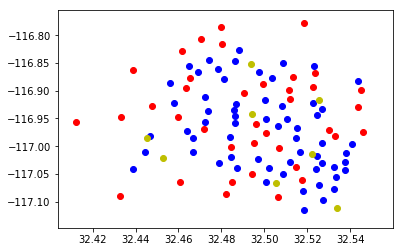

62.0

In [5]:
radius_to_coverage(r1=500)

In [6]:
def coverage_to_radius(target_coverage, step=True):
    r = 1700
    actual_coverage = 99999999
    
    
    # Binary search downwards from r=2000 towards optimal r.
    if step: print("Going down. Actual should go below target. ")
    while (actual_coverage - target_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r /= 2
        
    
    
    # Binary search towards target_coverage
    if step: print("Going back up.")
    while (target_coverage - actual_coverage >= 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        if actual_coverage - target_coverage == 0: return r
        r += 200
        
    
    if step: print ("Going back down.")
    while (actual_coverage - target_coverage > 0):
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("Difference: %f"%(actual_coverage - target_coverage))
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
        
        if actual_coverage - target_coverage == 0: return r
        r -= 3
    
    if step: print ("Okay, they should be equal now. Go for the tight min.")
    while (actual_coverage == target_coverage):
        r -= 0.3
        actual_coverage = radius_to_coverage(r, graph=False)
        if step:
            print ("Difference: %f"%(actual_coverage - target_coverage))
            print ("target coverage: ", target_coverage)
            print ("actual coverage: " , actual_coverage, "\nr: ", r, "\n")
    r+=0.6
    
    return r

In [7]:
coverage_to_radius(100)

Going down. Actual should go below target. 
target coverage:  100
actual coverage:  100.0 
r:  1700 



1700

In [8]:
all_radiuses = []
for coverage in range (1, 101):
    print ("Doing: " , coverage)
    r = coverage_to_radius(coverage, step=False)
    all_radiuses.append([coverage, r])
    print ("Finished.")
    

Doing:  1
Finished.
Doing:  2
Finished.
Doing:  3
Finished.
Doing:  4
Finished.
Doing:  5
Finished.
Doing:  6
Finished.
Doing:  7
Finished.
Doing:  8
Finished.
Doing:  9
Finished.
Doing:  10
Finished.
Doing:  11
Finished.
Doing:  12
Finished.
Doing:  13
Finished.
Doing:  14
Finished.
Doing:  15
Finished.
Doing:  16
Finished.
Doing:  17
Finished.
Doing:  18
Finished.
Doing:  19
Finished.
Doing:  20
Finished.
Doing:  21
Finished.
Doing:  22
Finished.
Doing:  23
Finished.
Doing:  24
Finished.
Doing:  25
Finished.
Doing:  26
Finished.
Doing:  27
Finished.
Doing:  28
Finished.
Doing:  29
Finished.
Doing:  30
Finished.
Doing:  31
Finished.
Doing:  32
Finished.
Doing:  33
Finished.
Doing:  34
Finished.
Doing:  35
Finished.
Doing:  36
Finished.
Doing:  37
Finished.
Doing:  38
Finished.
Doing:  39
Finished.
Doing:  40
Finished.
Doing:  41
Finished.
Doing:  42
Finished.
Doing:  43
Finished.
Doing:  44
Finished.
Doing:  45
Finished.
Doing:  46
Finished.
Doing:  47
Finished.
Doing:  48
Finished.
D

In [9]:

for p in all_radiuses:
    print (np.array(p))

[   1.    106.25]
[   2.     162.125]
[   3.     192.125]
[   4.   212.5]
[   5.    227.25]
[   6.    230.25]
[   7.    227.85]
[   8.    266.25]
[   9.    278.25]
[  10.    275.85]
[  11.    293.25]
[  12.    296.25]
[  13.    299.25]
[  14.    296.85]
[  15.    328.25]
[  16.    325.85]
[  17.    325.85]
[  18.    325.85]
[  19.    331.25]
[  20.    346.25]
[  21.    349.25]
[  22.    352.25]
[  23.    358.25]
[  24.    355.85]
[  25.    376.25]
[  26.    379.25]
[  27.    376.85]
[  28.    376.85]
[  29.    385.85]
[  30.    391.25]
[  31.    394.25]
[  32.    397.25]
[  33.    400.25]
[  34.    403.25]
[  35.    406.25]
[  36.    409.25]
[  37.    406.85]
[  38.    412.25]
[  39.    418.25]
[  40.  425.]
[  41.   425.5]
[  42.   423.1]
[  43.   428.5]
[  44.   426.1]
[  45.   426.1]
[  46.   440.5]
[  47.   438.1]
[  48.   443.5]
[  49.   446.5]
[  50.   449.5]
[  51.   452.5]
[  52.   450.1]
[  53.   450.1]
[  54.   455.5]
[  55.   453.1]
[  56.   456.1]
[  57.   468.1]
[  58.   4

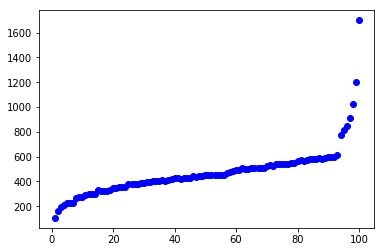

In [10]:
radius_array = np.array(all_radiuses)


plt.figure()
plt.scatter(radius_array[:,0],radius_array[:,1], c='b')
plt.show()